In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import lightgbm as lgb
import gc
from sklearn.model_selection import StratifiedKFold
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/ML Data/autism_train.csv")
test = pd.read_csv("/content/drive/MyDrive/ML Data/autism_test.csv")

In [ ]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
train.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [ ]:
print(train.isna().sum())
print(test.isna().sum())

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64
ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64


Check for NA values

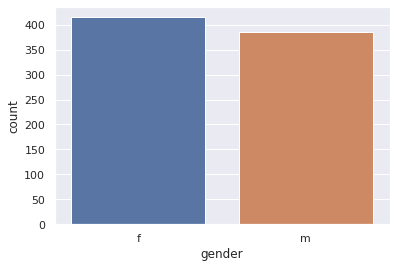

In [ ]:
sns.countplot(x='gender',data=train) #gender on train data

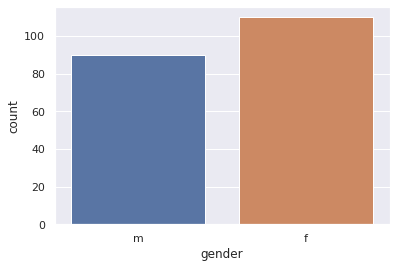

In [ ]:
sns.countplot(x='gender',data=test) #gender on test

Ethnicity

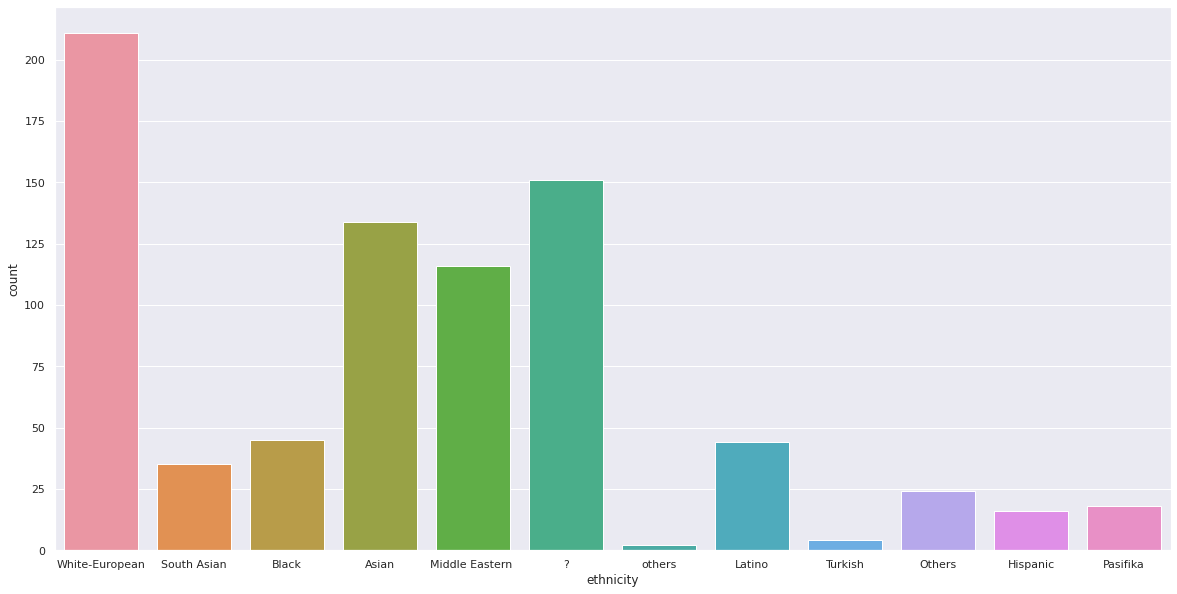

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='ethnicity',data=train)

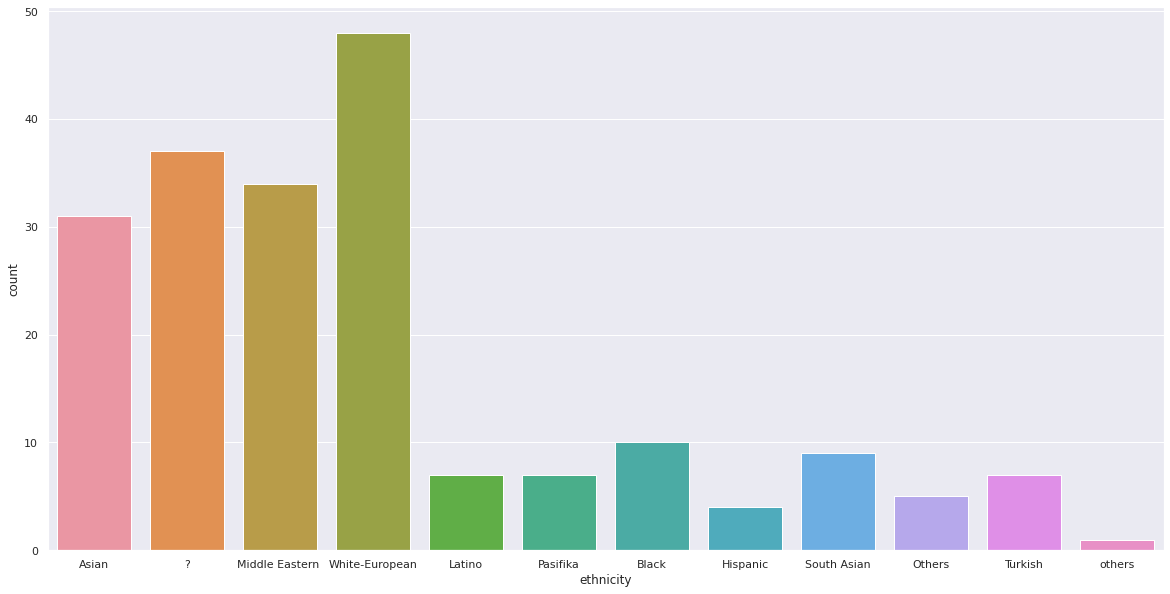

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='ethnicity',data=test)

Jaundice on birth or not

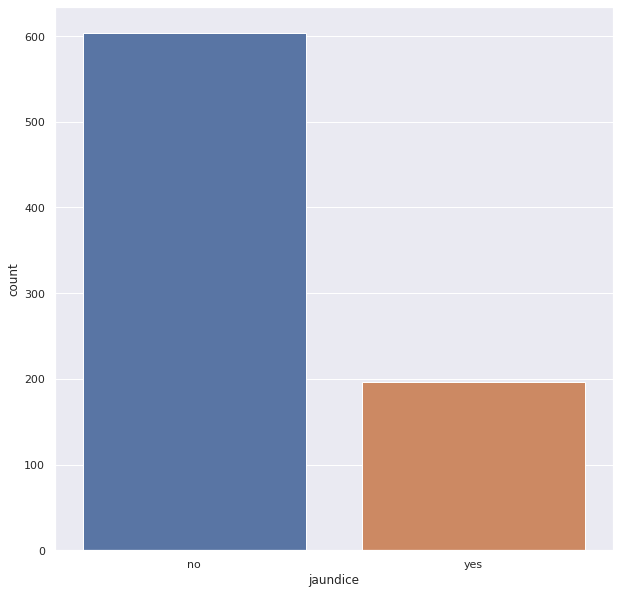

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='jaundice',data=train)

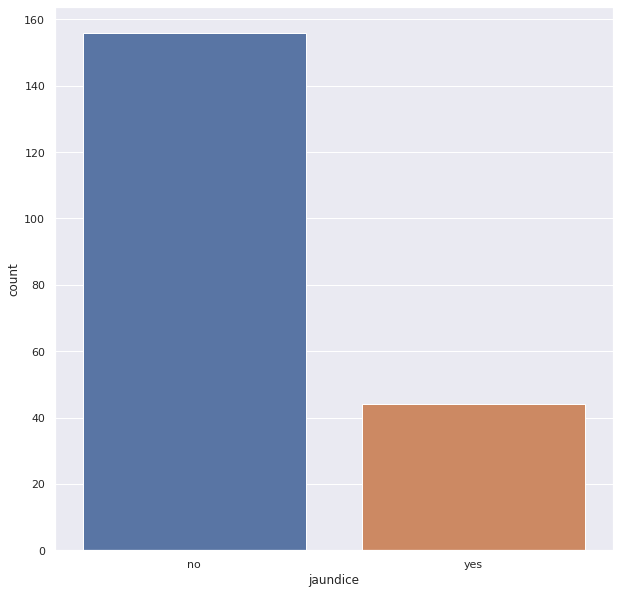

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='jaundice',data=test)

Autism

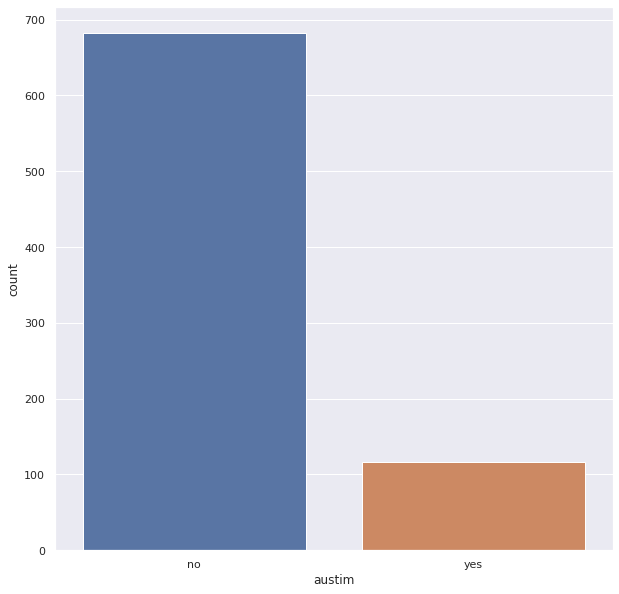

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='austim',data=train)

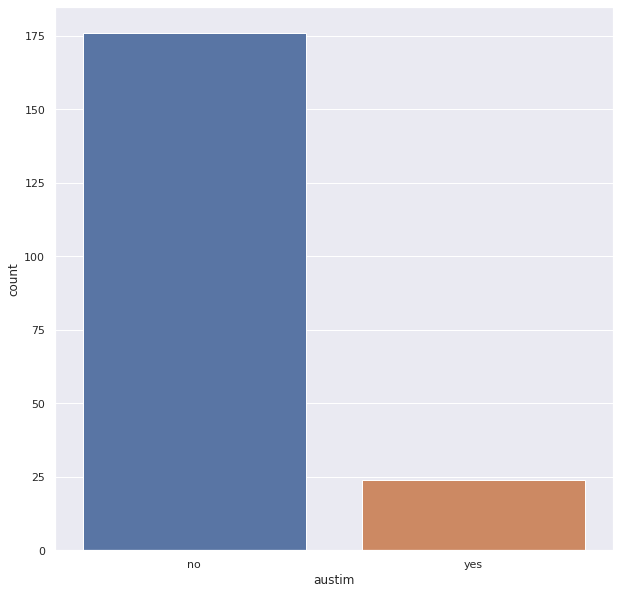

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='austim',data=test)

Country of the patient residence

In [ ]:
train["contry_of_res"].value_counts()

United States           148
United Arab Emirates     94
New Zealand              93
India                    74
United Kingdom           58
                       ... 
Indonesia                 1
Tonga                     1
Iraq                      1
Finland                   1
Niger                     1
Name: contry_of_res, Length: 61, dtype: int64

In [ ]:
len(train["contry_of_res"].value_counts())

61

In [ ]:
test["contry_of_res"].value_counts()

United States           34
United Arab Emirates    27
New Zealand             20
Jordan                  15
India                   14
United Kingdom          14
Australia                8
Afghanistan              6
Canada                   5
Austria                  4
Russia                   4
Viet Nam                 3
France                   3
AmericanSamoa            2
Pakistan                 2
Mexico                   2
Netherlands              2
Kazakhstan               2
Bahamas                  2
Brazil                   2
Spain                    2
Ethiopia                 2
Sri Lanka                2
Iran                     2
Iceland                  2
Lebanon                  1
Romania                  1
Italy                    1
Saudi Arabia             1
South Africa             1
Ukraine                  1
Azerbaijan               1
Egypt                    1
Philippines              1
Malaysia                 1
Serbia                   1
Armenia                  1
G

In [ ]:
len(test["contry_of_res"].value_counts())

44

A1_score to A10_score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

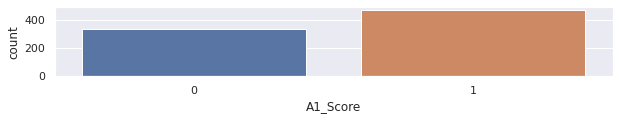

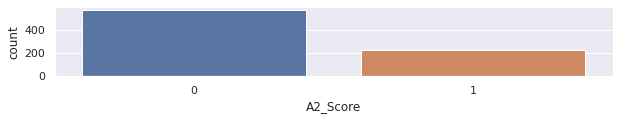

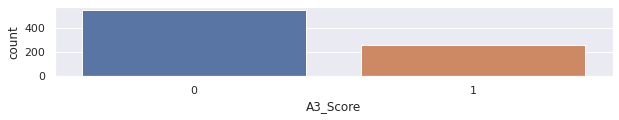

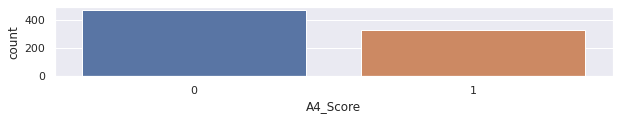

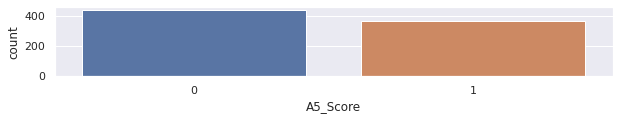

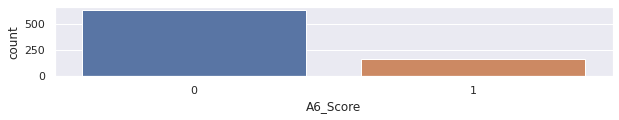

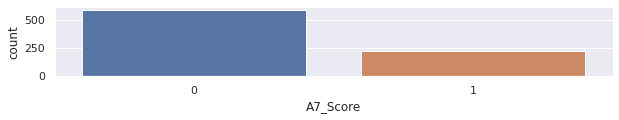

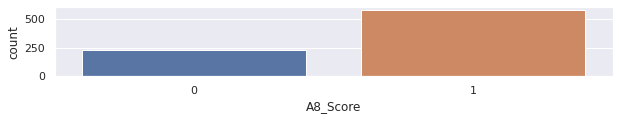

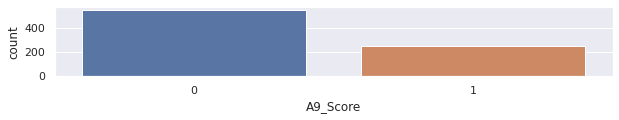

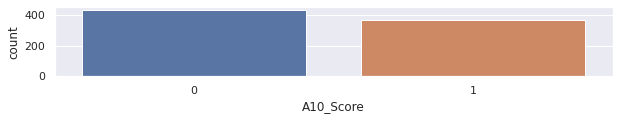

In [ ]:
score_columns = ["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score"]
i = 1
for col in score_columns:
    plt.figure(figsize=(10,15))
    plt.subplot(10,1,i)
    sns.countplot(train[col])
    i += 1

In [ ]:
train["result"].describe()

count    800.000000
mean       7.058530
std        3.788969
min       -2.594654
25%        4.527556
50%        6.893472
75%        9.892981
max       13.390868
Name: result, dtype: float64

Result

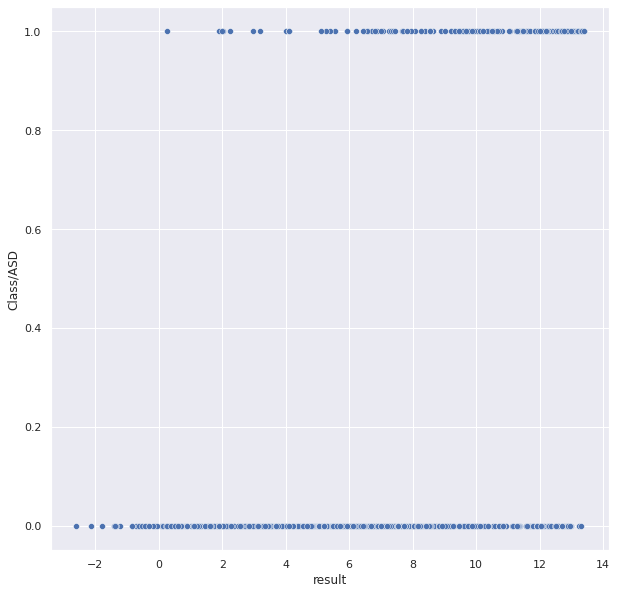

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=train,x="result",y="Class/ASD")

Result value less than 0 are only class 0 target

**Result of analysis**


1.   No missing/NA data
2.   No columns with constant values
3.   Gender distribution in the train and test datasets, is the same and is balanced.
4.    Highest number of patients are from ethinicity 'White European' in both test and train data.We have a lot of values with ethinicity ?, what could be a suitable replacement strategy?
5.Train data contains 75% of records of people that did not have jaundice when they were born.Test data has a similar distribution
6.    Country of residence has 61 unique values in the train dataset and United States, United Arab Emirates, New Zealand, India and United Kingdom have the highest record counts in that order in the train dataset. In the test dataset we have 44 unique values of countries United States, United Arab Emirates, New Zealand, Jordan and India are the top contributors in that order.
7. A1_score to A10_score are binary features that are encoded, we might me able to grasp more out of them once we look at it's correlation with target class variable.
8. Result values in the train data have a min of -2 and a maximum of 13 with a mean of 7
9. A scatterplot between result and class, tell us that result values less than 0 have a class of negative in the train data







Correlation between A1_Score to A10_Score

In [ ]:
correlation_columns = []
for col in score_columns:
    correlation_columns.append(col)
correlation_columns.append("Class/ASD")

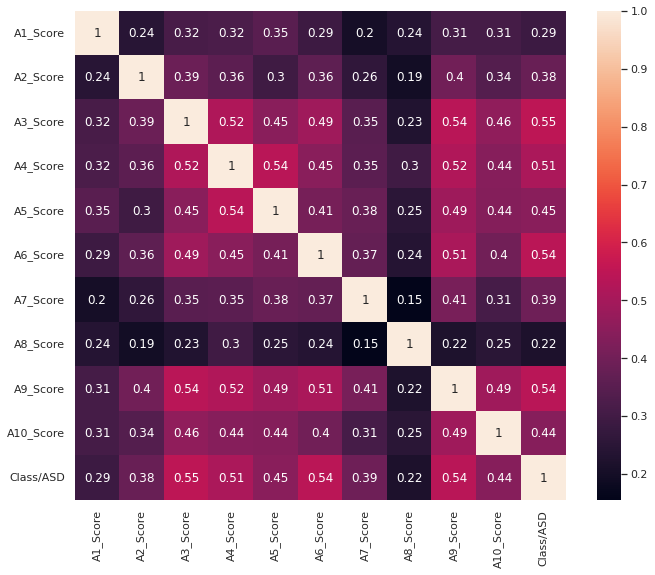

In [ ]:
correlation = train[correlation_columns].corr()
plt.figure(figsize=(11, 9))
sns.heatmap(correlation, annot = True)

A3 , A6, A9, A4, A5 and A10 have correlation with target variable greater than 0.4

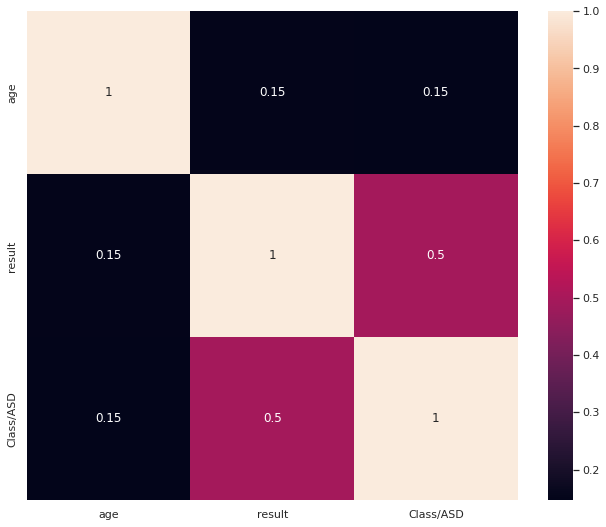

In [ ]:
correlation = train[["age", "result", "Class/ASD"]].corr()
plt.figure(figsize=(11, 9))
sns.heatmap(correlation,annot=True)

Age does not seem to have a very high correlation value with target

In [ ]:
target_male = train[train["gender"]=='m']['Class/ASD']
target_male.value_counts()

0    317
1     68
Name: Class/ASD, dtype: int64

In [ ]:
target_female = train[train["gender"]=='f']['Class/ASD']
target_female.value_counts()

0    298
1    117
Name: Class/ASD, dtype: int64

We can see that males have 82.3% records with target as 0 and females have 71% records with target 0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
transformed_gender = le.fit_transform(train["gender"]) # zero or one e convert kore felse gender


In [ ]:
train["transformed_gender"] = transformed_gender

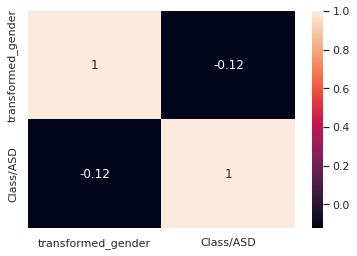

In [ ]:
corre = train[["transformed_gender","Class/ASD"]].corr()
sns.heatmap(corre, annot = True)

The correlation between gender and target seems to be low

[58  6 57 39 32 40 14 56 57 58 38  6 58 39 52  6 56 56 56 14 27 39 58 57
 40 27 39 38 57 38 58 39  4 49 27  3  8 26 20 56 48 56 52 56 57 58  0 58
 16 56 58  0 58 39  0 56 34 27 39  6  2 43  6 13 31 58 57 20 35 52 57 39
 58 38 27 58 60 21 39  7 58 58 27 22 39 39 27 56 58 58 32 23 39  6 56  6
 52 58 57 56 34 38 27  0 27 58 56  0 36  0 58 27 52 23 39  7 34 39 58 57
 56 57 34 38 58 57 58 58 39 60 57 39 23 34 58  6  6 14 14 34 58 57 57 58
 58 33 27 39 57 27 27 39 39  7 34 39 38 56 58 56 27 51 39 39  0 27 58 58
 57 60 56 58 58 27 26 27 39 34  6 34  6 57 58 27 44 34 56 27 29  0  6 56
 56 27 58  0 56 34 23 34 58 58 13 18 27 27 34 46 56 27 56 34 58 14 45 56
 39 58 34 57 18  6 58 56 52 14 37 57 58  6 45  7 39 58 58 57 58 27 58 20
 11 56 56 38 58 27 56 40 27 27 56 58  5 56 52 27 33 46 39  6 39 57 59  6
 58 34 39 56 14 13 57 56 52 27 57 34 52  6 34 58 32 56 56  6 27 27 37 39
 56  7 28 57 55 58 35 39 56 27 56 56 56  6  0  7 32 27 46 39 56 58 27 32
 58 39 58 34  0  1 34 58 57 24 21 56 58  7 57 34 14

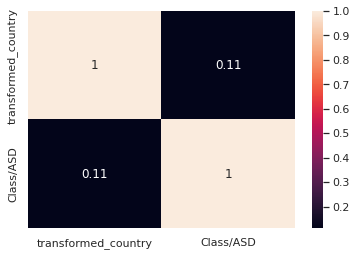

In [ ]:
le = LabelEncoder()
transformed_country = le.fit_transform(train["contry_of_res"]) # country tranform
train["transformed_country"] = transformed_country
corre = train[["transformed_country","Class/ASD"]].corr()
sns.heatmap(corre,annot=True)
print(transformed_country)

The correlation between country of residence and target seems to be low

Ethnicity

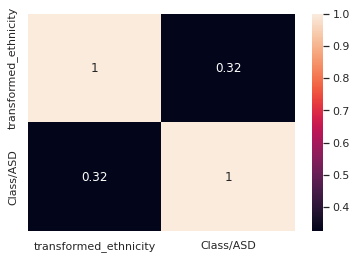

In [ ]:
le = LabelEncoder()
transformed_ethnicity = le.fit_transform(train["ethnicity"])
train["transformed_ethnicity"] = transformed_ethnicity
corre = train[["transformed_ethnicity","Class/ASD"]].corr()
sns.heatmap(corre,annot=True)

Ethnicity seems to have a decent correlation with the target

Jaundice

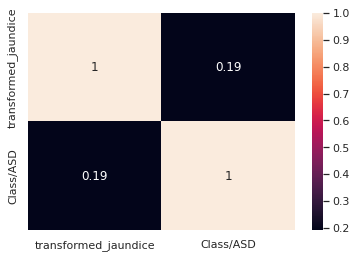

In [ ]:
le = LabelEncoder()
transformed_jaundice = le.fit_transform(train['jaundice'])
train["transformed_jaundice"] = transformed_jaundice
corre = train[["transformed_jaundice", "Class/ASD"]].corr()
sns.heatmap(corre, annot = True)

Jaundice seems to have a decent correlation with the target

Autism - family member diagnost with autism

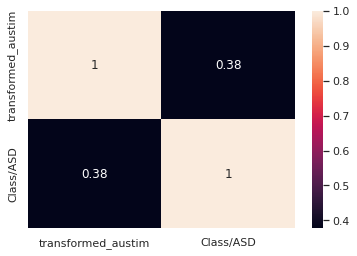

In [ ]:
le = LabelEncoder()
transformed_austim = le.fit_transform(train["austim"])
train["transformed_austim"] = transformed_austim
corre = train[["transformed_austim","Class/ASD"]].corr()
sns.heatmap(corre,annot=True)
transformed_austim_te = le.fit_transform(test["austim"])
test["transformed_austim"] = transformed_austim_te

Autism seems to have a decent correlation with the target

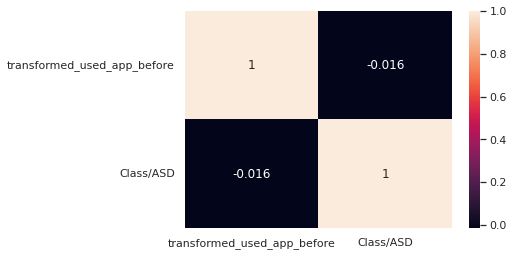

In [ ]:
le = LabelEncoder()
transformed_used_app_before = le.fit_transform(train["used_app_before"])
train["transformed_used_app_before"] = transformed_used_app_before
corre = train[["transformed_used_app_before","Class/ASD"]].corr()
sns.heatmap(corre,annot=True)

used_app_before does not have high correlation with target

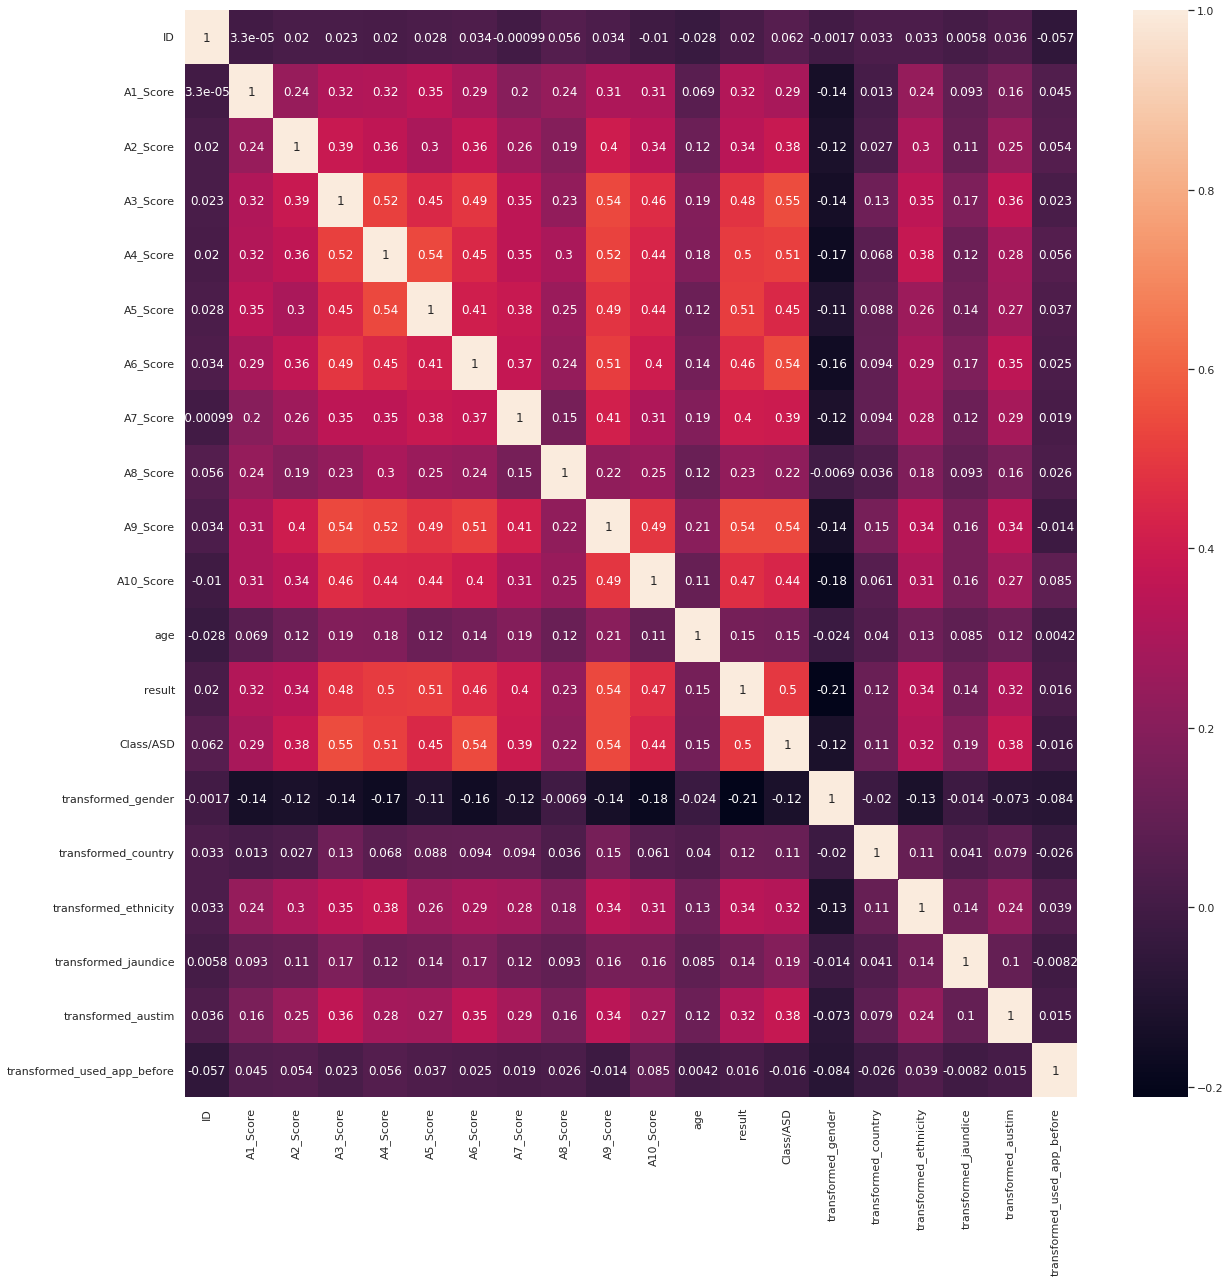

In [ ]:
correlation = train.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation,annot=True)

In [ ]:
le = LabelEncoder()
transformed_austim = le.fit_transform(test["austim"])
test["transformed_austim"] = transformed_austim


In [ ]:
le = LabelEncoder()
transformed_austim = le.fit_transform(test["ethnicity"])
test["transformed_ethnicity"] = transformed_austim

test

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,transformed_austim,transformed_ethnicity
0,1,0,0,0,0,0,0,0,1,0,...,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?,0,1
1,2,1,0,0,0,1,0,0,0,0,...,?,yes,no,New Zealand,no,4.553447,18 and more,Parent,0,0
2,3,1,0,0,1,0,1,0,1,0,...,Asian,no,no,Austria,no,-1.581115,18 and more,Self,0,1
3,4,1,1,1,0,1,0,1,0,1,...,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative,0,5
4,5,1,0,0,1,1,0,0,1,1,...,White-European,no,no,Australia,no,10.717321,18 and more,Self,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,0,0,0,0,0,1,0,0,...,South Asian,no,no,New Zealand,no,6.474056,18 and more,Self,0,8
196,197,1,1,1,0,1,0,0,0,1,...,White-European,no,yes,Brazil,no,9.114055,18 and more,Self,1,10
197,198,1,0,1,1,1,0,0,1,1,...,South Asian,yes,no,New Zealand,no,8.519987,18 and more,Self,0,8
198,199,1,1,1,1,1,1,1,1,1,...,White-European,yes,no,United Kingdom,no,11.740482,18 and more,Self,0,10


Features with highest correlation to the target seem to be the below
A3_Score

A2_Score

A4_Score

A5_Score

A6_Score

A7_Score

A9_Score

A10_Score

Autism

Ethnicity

Result

In [ ]:
train = train[["A3_Score","A2_Score","A4_Score","A5_Score","A6_Score","A7_Score","A9_Score","A10_Score","transformed_austim","transformed_ethnicity","Class/ASD","transformed_jaundice", "result"]]

In [ ]:
y = pd.DataFrame(train["Class/ASD"])


In [ ]:
train = train.drop(["Class/ASD"], axis = 1)

In [ ]:
train

,A3_Score,A2_Score,A4_Score,A5_Score,A6_Score,A7_Score,A9_Score,A10_Score,transformed_austim,transformed_ethnicity,transformed_jaundice,result
0,1,0,1,1,1,0,1,1,0,10,0,7.819715
1,0,0,0,0,0,0,0,1,0,8,0,10.544296
2,1,1,1,1,1,0,1,1,0,10,0,13.167506
3,0,0,1,0,0,0,0,0,0,8,0,1.530098
4,0,0,0,1,0,0,1,1,1,2,0,7.949723
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,10,0,13.390868
796,0,1,0,1,0,0,1,1,0,1,0,9.454201
797,0,0,0,0,0,1,1,1,0,10,1,6.805509
798,1,1,1,1,1,0,1,1,1,5,0,3.682732


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = np.stack([train[col].values for col in train], 1)
train = torch.tensor(train, dtype=torch.float)

y = np.stack([y[col].values for col in y], 1)
y = torch.tensor(y, dtype=torch.float).flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state = 33)

In [ ]:
X_train.shape

torch.Size([640, 12])

In [ ]:
y_train.shape

torch.Size([640])

In [ ]:
import torch
import torch.nn as nn

In [ ]:
y_train.shape

torch.Size([640])

In [ ]:
class TabularModel(nn.Module):

    def __init__(self, n_cont, out_sz, layers):
        super().__init__()
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_in = n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cont):
        x_cont = self.bn_cont(x_cont)
        x_cont = self.layers(x_cont)
        return x_cont

In [ ]:
torch.manual_seed(33)
model = TabularModel(X_train.shape[1], 2, [200,100])

In [ ]:
model

TabularModel(
  (bn_cont): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

Define loss function & optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
y_train = y_train.type(torch.LongTensor)
y_test = y_test.type(torch.LongTensor)

In [ ]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    #a neat trick to save screen space:
    rows = 640
    correct = 0;
    for j in range(rows):
      if y_pred[j].argmax().item() == y_train[j]:
          correct += 1

    accuracy = 100*correct/rows
    if i%10 == 1:
        print(f'epoch: {i:4}  loss: {loss.item():10.8f} accuracy: {accuracy:10.2f}%')


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:4}  loss: {loss.item():10.8f} accuracy: {accuracy:10.2f}%') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:    1  loss: 0.73440325 accuracy:      53.59%
epoch:   11  loss: 0.40394264 accuracy:      87.19%
epoch:   21  loss: 0.34320456 accuracy:      90.31%
epoch:   31  loss: 0.29467845 accuracy:      92.97%
epoch:   41  loss: 0.24170868 accuracy:      95.31%
epoch:   51  loss: 0.18621877 accuracy:      95.78%
epoch:   61  loss: 0.13665769 accuracy:      97.03%
epoch:   71  loss: 0.09877443 accuracy:      98.28%
epoch:   81  loss: 0.07208541 accuracy:      98.44%
epoch:   91  loss: 0.05459551 accuracy:      99.06%
epoch:  101  loss: 0.04354287 accuracy:      99.22%
epoch:  111  loss: 0.03733041 accuracy:      99.06%
epoch:  121  loss: 0.03129036 accuracy:      99.22%
epoch:  131  loss: 0.02775195 accuracy:      99.22%
epoch:  141  loss: 0.03150409 accuracy:      99.22%
epoch:  151  loss: 0.02565767 accuracy:      99.22%
epoch:  161  loss: 0.02346460 accuracy:      99.22%
epoch:  171  loss: 0.02277493 accuracy:      99.22%
epoch:  181  loss: 0.02118678 accuracy:      99.53%
epoch:  191 

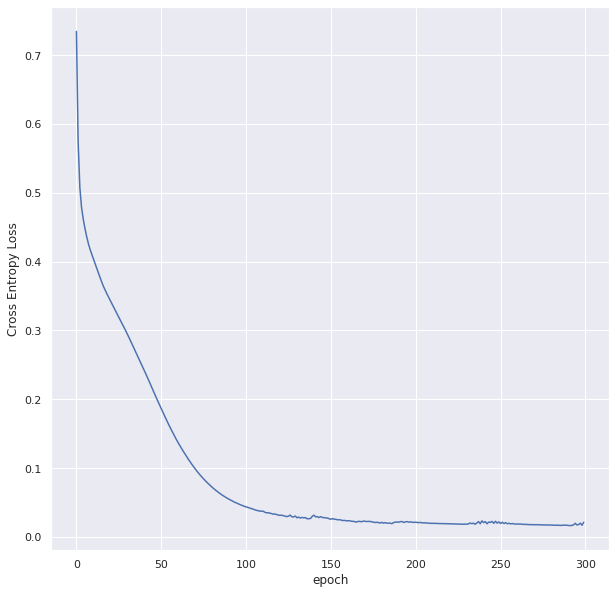

In [ ]:

plt.figure(figsize=(10, 10))
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

Validate the model

In [ ]:
with torch.no_grad():
  y_pred = model(X_test)
  loss = criterion(y_pred, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 1.17302728


In [ ]:
rows = 160
correct = 0
print(f'{"MODEL OUTPUT":30} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_pred[i]):30} {y_pred[i].argmax():^7}{y_test[i]:^7}')
    if y_pred[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT                   ARGMAX  Y_TEST
tensor([ 5.4544, -6.7602])        0      0   
tensor([-0.4829,  1.0690])        1      0   
tensor([-3.2477,  4.5675])        1      1   
tensor([ 0.2021, -0.5580])        0      0   
tensor([-17.3123,  20.8159])      1      1   
tensor([ 3.9590, -4.5624])        0      0   
tensor([ 3.0456, -4.4491])        0      0   
tensor([ 4.0630, -4.6784])        0      0   
tensor([ 3.7706, -3.7691])        0      0   
tensor([ 3.8087, -4.7173])        0      0   
tensor([ 4.7476, -4.3664])        0      0   
tensor([-1.8506,  1.9380])        1      1   
tensor([ 2.8248, -4.0675])        0      1   
tensor([ 2.1021, -2.9411])        0      0   
tensor([ 2.7257, -2.0330])        0      0   
tensor([ 3.7871, -4.5565])        0      0   
tensor([ 3.6110, -4.6837])        0      0   
tensor([ 2.6464, -3.3759])        0      0   
tensor([-0.4855, -0.8921])        0      0   
tensor([ 3.7925, -3.3599])        0      0   
tensor([ 3.4230, -3.9704])        

In [ ]:
X_train

tensor([[ 0.0000,  1.0000,  0.0000,  ..., 10.0000,  0.0000,  8.3902],
        [ 0.0000,  0.0000,  0.0000,  ...,  5.0000,  0.0000, 10.7327],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  2.0622],
        ...,
        [ 0.0000,  1.0000,  0.0000,  ...,  8.0000,  0.0000,  1.8830],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  1.0000,  2.9422],
        [ 0.0000,  0.0000,  0.0000,  ...,  5.0000,  0.0000,  1.4184]])